**Problem statement:**

**Banglore House Price dataset for predicting the price of house in Bangalore**

**Importing Liabraries**

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
scaler=StandardScaler()
import matplotlib.pyplot as plt

In [138]:
#Importing csv File

df=pd.read_csv('/Bengaluru_House_Data.csv')
df



,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [140]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


**Data Cleaning or missing value treatment**

In [187]:
df.fillna(df.median(),inplace=True)

In [188]:
df["size"].value_counts()
df["size"].fillna("2 BHK",inplace=True)

In [ ]:
df["location"].value_counts()
df["location"].fillna("Whitefield ",inplace=True)
df.isna().sum()

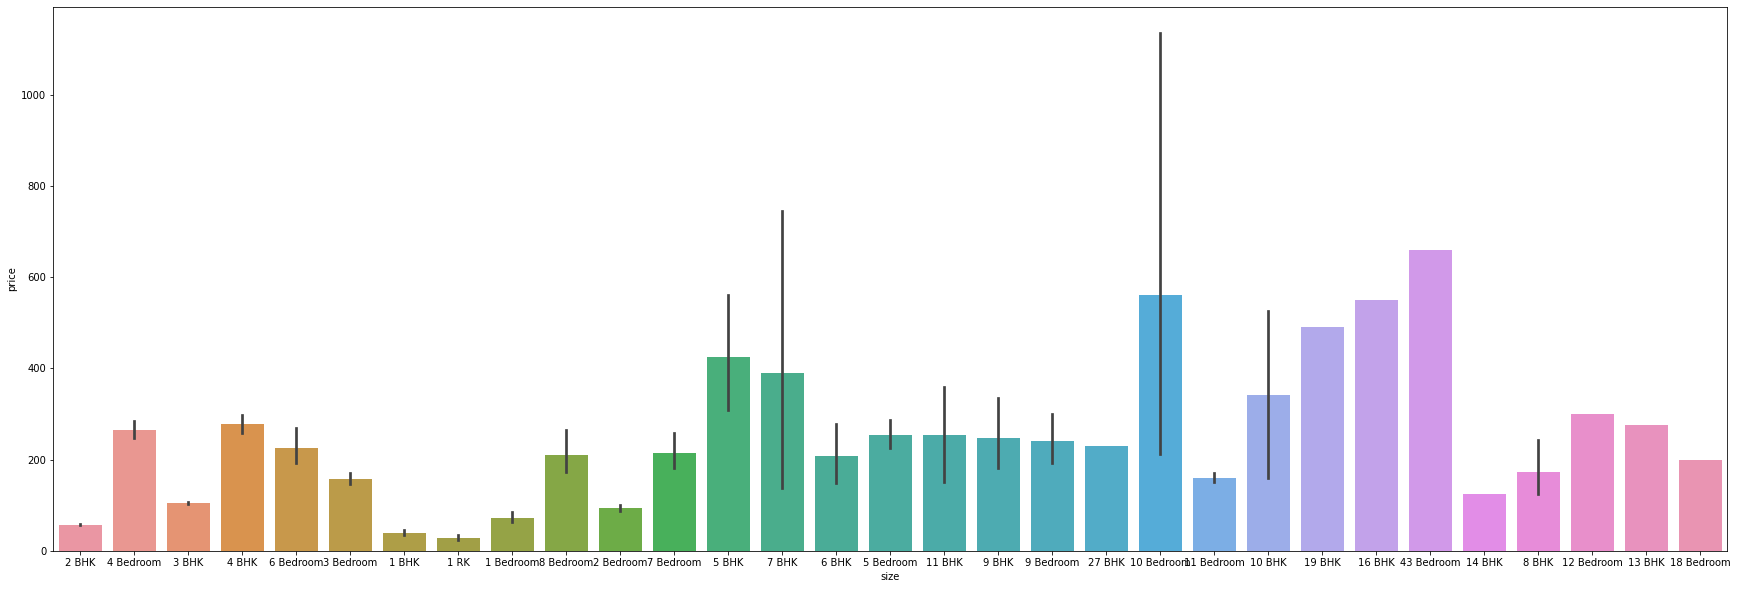

In [149]:
#VISUALIZING THE DATA

plt.figure(figsize=(30,10))
sns.barplot(x='size', y ='price',data = df)

In [150]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [151]:
df=df.drop(["society","availability"],axis=1)
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [152]:
df['size']= df['size'].apply(lambda x :float(x.split(' ')[0]))

df['location'] = df['location'].apply(lambda x : x.strip())
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [156]:
#function to check value is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [155]:
df[df['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4.0,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4.0,4689,4.0,1.0,488.00


**CORRELATION**

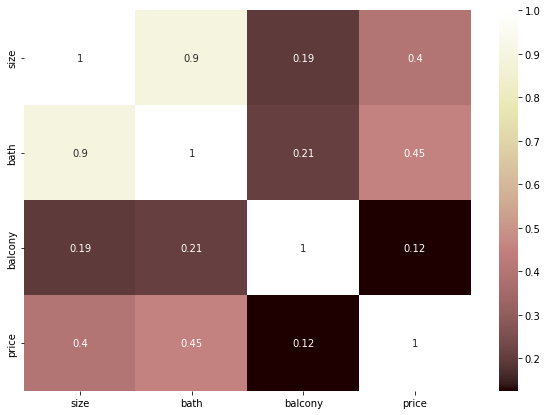

In [163]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap="pink")

In [159]:
df.corr()['price']

size       0.398074
bath       0.454449
balcony    0.124951
price      1.000000
Name: price, dtype: float64

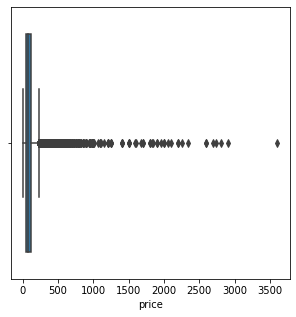

In [164]:
#FINDING THE OUTLIERS

sns.boxplot(x=df["price"])

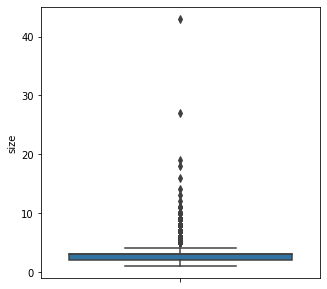

In [165]:
sns.boxplot(y=df["size"])

In [167]:
# Position of the Outlier
a=np.where(df['price']>250)
a[0]

array([    7,     9,    11, ..., 13306, 13316, 13318])

In [168]:
df['total_sqft'].values

array(['1056', '2600', '1440', ..., '1141', '4689', '550'], dtype=object)

In [169]:
#MODEL SELECTION AND MODEL TRAINING
df=pd.get_dummies(df,drop_first=True )
df

,size,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1 Giri Nagar,location_1 Immadihalli,location_1 Ramamurthy Nagar,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,2.0,2.0,1.0,39.07,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,5.0,3.0,120.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,3.0,62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,1.0,95.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1.0,51.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5.0,4.0,0.0,231.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,4.0,5.0,2.0,400.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,2.0,1.0,60.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,4.0,1.0,488.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
x = df.drop(columns=['price'])
y = df['price']


In [174]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 3415 entries, size to total_sqft_999
dtypes: float64(3), uint8(3412)
memory usage: 43.6 MB


In [175]:
#APPLYING STANDARD SCALER

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)

array([[-0.62017048, -0.51453799, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [ 0.92489092,  1.72643617,  1.73917463, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [ 0.15236022, -0.51453799,  1.73917463, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       ...,
       [-0.62017048, -0.51453799, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [ 0.92489092,  0.97944479, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ],
       [-1.39270118, -1.26152937, -0.75137056, ..., -0.0122545 ,
        -0.00866491, -0.0150092 ]])

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
y_train

6020      62.00
3185     108.00
11847    108.00
4638      82.00
7926      75.00
          ...  
2514      67.50
11798     31.99
6637      35.07
2575     145.50
7336      70.00
Name: price, Length: 9324, dtype: float64

In [177]:
#LINEAR REGRESSION

from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [198]:
test_p = lm.predict(x_test)
train_p=lm.predict(x_train)
lm_score = lm.score(x_test,y_test)
print(lm_score*100,'%')

-1.730991420724959e+22 %


In [199]:
#RANDOM FOREST REGRESSION

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10)
rfr.fit(x_train, y_train)
RandomForestRegressor(n_estimators=10)
test_pr = rfr.predict(x_test)
train_pr=rfr.predict(x_train)
rfr_score = rfr.score(x_test,y_test)
print(rfr_score*100,'%')

42.59685115742088 %
